# Math foundation
### Assumptions
##### 1. Stocks follow a geometric brownian motion
##### 2. Stocks pay annual dividend D and have an expected return $ \mu = r - D $ with $ r $ being the risk-free rate
##### 3. The volatility $ \sigma $ of the underlying is assumed to be constant

### The Stock Price Evolution Model

#### $$ dS_t = \mu S_tdt + \sigma S_tdW_t $$

Ito process (Stochastic process that can be expressed as the sum of an integral wrt. to Brownian motion and an integral wrt. time)

With Ito's Lemma it follows

#### $$ dG = \Bigl( \frac{\partial G}{\partial S}S\mu + \frac{\partial G}{\partial t} + \frac{1}{2} \frac{\partial ^2 G}{\partial S^2} S^2\sigma ^2 \Bigr)dt + \frac{\partial G}{\partial S}S\sigma dW_t $$ 

#### $$ G = ln(S) $$

##### $$ \frac{\partial G}{\partial S} = \frac{1}{S} \quad ; \quad \frac{\partial G}{\partial t} = 0 \quad ; \quad \frac{\partial ^2 G}{\partial S^2} = -\frac{1}{S^2}$$

Plugging partial derivatives into Ito's lemma results in

#### $$ dG = \Bigl( \frac{1}{S}S\mu + 0 - \frac{1}{2}\frac{1}{S^2}S^2\sigma ^2 \Bigr)dt + \frac{1}{S}S\sigma dW_t $$

#### $$ = \Bigl( \mu - \frac{\sigma ^2}{2} \Bigr)dt + \sigma dW_t $$ 

With $ t = T $, the distribution of $ln(\frac{S_t}{S_0})$ is 
#### $$ ln(\frac{S_t}{S_0}) = \Bigl( \mu - \frac{\sigma ^2}{2} \Bigr)T + \sigma \sqrt{T} $$

With $ ^e $ on both sides, we get
#### $$ S_T = S_0e^{(\mu - \frac{\sigma ^2}{2})dt + \sigma dW_t} $$

Which can be rewritten to
#### $$ ln{(S_T)} = ln{(S_0)} + \int_0^t \Bigl( \mu - \frac{\sigma ^2}{2} \Bigr) \, dt + \int_0^t \sigma dW_t $$

# Code Implementation

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def paths(S, T, r, D, sigma, steps, N):
    """
    Inputs:
    
    S = Current Stock Price
    K = Strike Price
    T = Time to maturity in years
    r = risk-free rate
    D = Dividend Yield
    sigma = Volatility
    
    Outputs:
    [steps, N] = Matrix of asset paths
    """
    # Infinitesimal steps
    dt = T/steps
    
    # This implements the last formula. np.cumsum is essentially integrating
    ST = np.log(S) +  np.cumsum(((r - D - sigma**2/2)*dt + \
                                 sigma*np.sqrt(dt) * \
                                 np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

def sim_call(S, K, T, r, D, sigma, steps, N):
    simulation = paths(S, T, r, D, sigma, steps, N)
    payoffs = np.maximum(simulation[-1]-K, 0) # Payoff is max{ST - K, 0}
    sim_price = np.mean(payoffs)*np.exp(-r*T) # Mean of all simulated payoffs discounted to today
    
    return sim_price

def sim_put(S, K, T, r, D, sigma, steps, N):
    simulation = paths(S, T, r, D, sigma, steps, N)
    payoffs = np.maximum(K-simulation[-1], 0) # Payoff is max{K - ST, 0}
    sim_price = np.mean(payoffs)*np.exp(-r*T) # Mean of all simulated payoffs discounted to today
    
    return sim_price

# Closed-form solution

### Black-Scholes Formula for European **Call Option**

#### $$ C(S_t,t) = e^{-r(T-t)}[FN{(d_1)-KN{(d_2)}}] $$

### Black-Scholes Formula for European **Put Option**

#### $$ P(S_t,t) = e^{-r(T-t)}[KN{(-d_2)-FN{(-d_1)}}] $$

#### with $ F = S_t e^{(r-D)(T-t)} $

In [18]:
from scipy.stats import norm

def bs_call(S, K, T, r, D, sigma):
    """
    Inputs:
    
    S = Current Stock Price
    K = Strike Price
    T = Time to maturity in years
    r = risk-free rate
    D = Dividend Yield
    sigma = Volatility
    
    Outputs:
    [steps, N] = Matrix of asset paths
    """
    # Define d1, d2 and put them together in the Black Scholes Formula
    
    d1 = (np.log(S/K) + (r - D + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    
    call = S * np.exp(-D*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call

def bs_put(S, K, T, r, D, sigma):
    """
    Inputs:
    
    S = Current Stock Price
    K = Strike Price
    T = Time to maturity in years
    r = risk-free rate
    D = Dividend Yield
    sigma = Volatility
    
    Outputs:
    [steps, N] = Matrix of asset paths
    """
    # Define d1, d2 and put them together in the Black Scholes Formula
    
    d1 = (np.log(S/K) + (r - D + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    
    put = K * np.exp(-r*T)*norm.cdf(-d2) - S * np.exp(-D*T)* norm.cdf(-d1)
    return put
    

#### Comparison of Monte-Carlo vs. Closed-form solution

The Closed-form solution Black-Scholes Price is: 9.21297734396051
The Monte-Carlo simulated Price is: 9.790418574612545


Text(0.5, 1.0, 'Geometric Brownian Motion for Stock S')

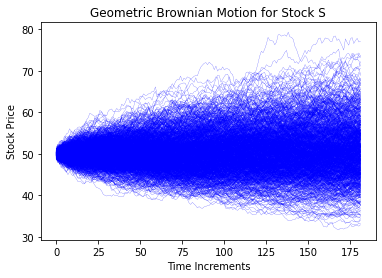

In [58]:
S = 50
K = 60
T = 1/2
r = 0.03
D = 0
sigma = 0.20
steps = int(365*T)
N = 1000

# Long Call

bs_price = bs_put(S, K, T, r, D, sigma)
sim_price = sim_put(S, K, T, r, D, sigma, steps, N)

print('The Closed-form solution Black-Scholes Price is: '+ str(bs_price))
print('The Monte-Carlo simulated Price is: '+ str(sim_price))

simulation = paths(S, T, r, D, sigma, steps, N) 

# Plot of simulations
plt.plot(simulation, linewidth=0.25, color="blue", alpha=0.7)
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion for Stock S")